In [60]:
import numpy as np
import torch as pt
import torch.autograd as agrad
import matplotlib.pyplot as plt
from util.plot_tools import *
from architecture.fno_1d import *
from boundary_solvers.blobs import *
from boundary_solvers.geometry import *
from scipy.sparse.linalg import gmres, LinearOperator
from operators.stokes_operator import StokesAdjointBoundaryOp
import torch.nn as nn

In [61]:
path = lambda i: f"/mnt/data0/emastr/article_training/fno_ver{i}_seed0_40000.Torch"

[0.41696619 0.41694279 0.42072769 0.57599078]


Text(0, 0.5, 'Number of layers')

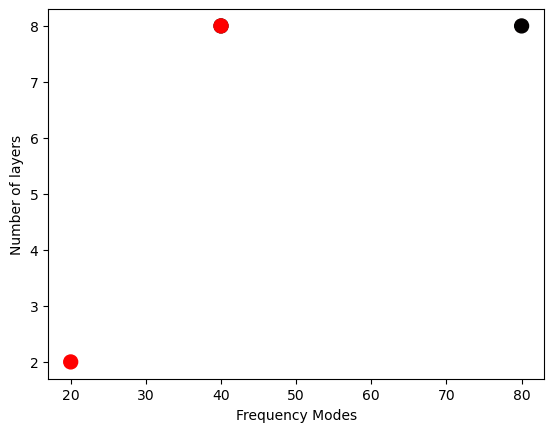

In [62]:
x = []
y = []
e = []

for i in range(1,5):
    data = torch.load(path(i))
    settings = data["settings"]
    testloss = data["testloss"]
    n_f = len(settings.pop("input_features"))
    widths = settings.pop("layer_widths", None)
    if widths is None:
        depth = 4
    else:
        depth = len(widths)    
    err = np.mean(testloss[-100:])**0.5
    x.append(settings["modes"])
    y.append(depth)
    e.append(err)
    
    
e = np.array(e)
enorm = np.minimum(1, 80*(e-min(e))/(max(e)-min(e)))
#e = e / max(e)
c =  np.array([1,0,0])*enorm[:, None]
print(e)

plt.scatter(x, y, s=100, c=c)#s=5000 * testloss[-1]**0.5, c='black')
plt.xlabel("Frequency Modes")
plt.ylabel("Number of layers")

In [63]:
import numpy as np
import torch as pt
import torch.autograd as agrad
import matplotlib.pyplot as plt
from util.plot_tools import *
from architecture.fno_1d import *
from boundary_solvers.blobs import *
from boundary_solvers.geometry import *
from scipy.sparse.linalg import gmres, LinearOperator
from operators.stokes_operator import StokesAdjointBoundaryOp
import torch.nn as nn
import os
path = "/mnt/data0/emastr/article_training/"
saves = os.listdir(path)
types = []
#names = ["svdfnof_ver1", "svdfnof_ver2", "svdfno_ver1", "svdfno_ver2", "svdfno_ver3", "svdfno_ver4", "fno_ver1", "fno_ver2", "fno_ver3", "fno_ver4", "unrolled", "ufno", "test_1", "unknown"]
names = ["fnoskip_big_data", "svdfno_ver3_seed0", "svdfno_ver3_seed1", "svdfno_ver4_seed0", "svdfno_ver4_seed1", "fno_ver1_seed0", "fno_ver1_seed1", "other"]
#names = [f"svdfno_ver{i}_seed{j}" for i in [1,2,3,4] for j in [0,1,2,3,4,5]] + \
#        [f"fno_ver{i}_seed{j}" for i in [1,2,3,4] for j in [0,1,2,3,4,5]] + ["other"]
#names = ["svdfno_ver1", "fno_ver1", "test_1"]

data_dict = {name: {"loss": [], "param": []} for name in names}

for s in saves:
    match = False
    for i, n in enumerate(names[:-1]):
        if s[0:len(n)] == n:
            match = True
            types.append(n)
            break
    if not match:
        types.append(names[-1])


In [64]:

for i, save in enumerate(saves):
    #print(saves[i], end="\n")
    if save[-11:] == "20000.Torch":
        try:
            data = torch.load(f"{path}{save}")
            testloss = data["testloss"]
            num_par = sum([np.prod(s.shape) for s in data["state dict"].values()])
            stableloss = np.mean(testloss[-1000:])
    
            data_dict[types[i]]["loss"].append(stableloss)
            data_dict[types[i]]["param"].append(num_par)
            
        except:
            continue

#data_dict
    

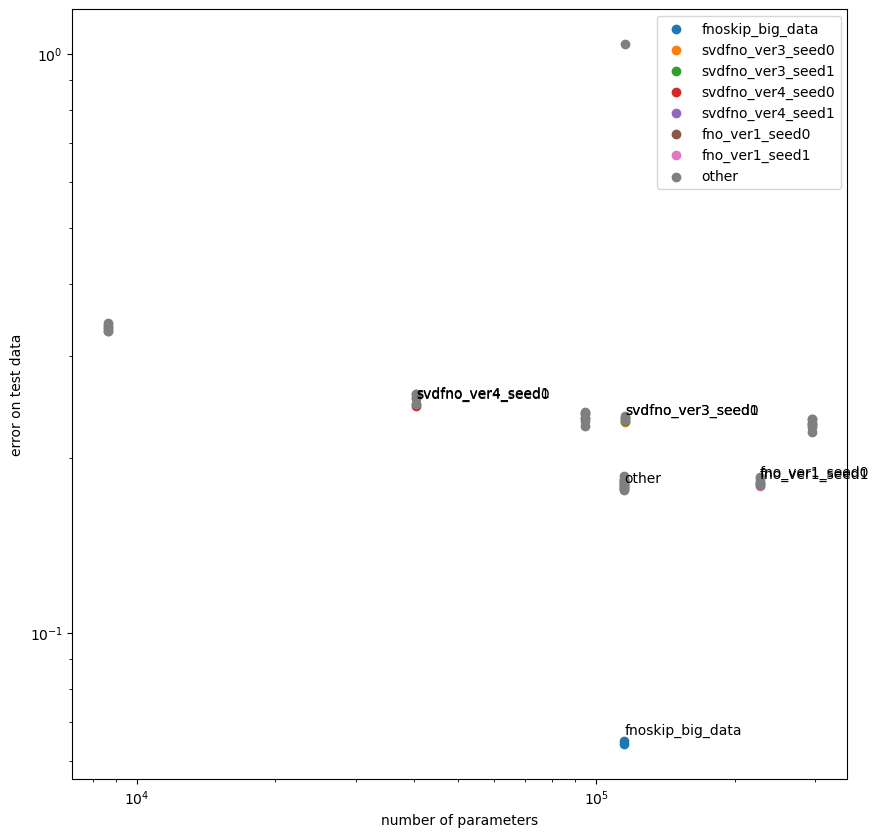

In [65]:
plt.figure(figsize=(10,10))
for i in range(len(names)):
    if len(data_dict[names[i]]["loss"]) != 0:
        plt.scatter(data_dict[names[i]]["param"], \
                    data_dict[names[i]]["loss"], label=names[i])
        
        plt.text(data_dict[names[i]]["param"][-1], \
                 data_dict[names[i]]["loss"][-1]*1.03, \
                 f"{names[i]}")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("number of parameters")
plt.ylabel("error on test data")
plt.legend()

#plt.scatter(num_pars, errs, c=type_list, alpha=1, cmap="tab10")
#plt.legend()
#plt.yscale("log")
#plt.xscale("log")
#plt.xlabel("number of parameters")
#plt.ylabel("error on test data")
#plt.xlim([1e3,1e7])#([0,0.4*1e7]


In [66]:
dataset = torch.load("/home/emastr/phd/data/article_training/svdfnof_ver2_19000.Torch")
dataset["settings"]
plt.imshow(torch.diag(dataset['state dict']['scale']).cpu().numpy())
print(torch.diag(dataset['state dict']['scale']).cpu().numpy())

FileNotFoundError: [Errno 2] No such file or directory: '/home/emastr/phd/data/article_training/svdfnof_ver2_19000.Torch'